In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [4]:
two_SNP_heatmap_df = pd.read_csv(snakemake.input.two_SNP_heatmap_csv)
two_SNP_heatmap_df

,PANGENOME_VARIATION_ID,FIRST_SAMPLE,SECOND_SAMPLE,GENOMES,CHROMS,POSITIONS,SEQUENCES
0,0,063_STEC,CFT073,063_STEC;CFT073,0;0,1582;4411912,G;T
1,2,063_STEC,CFT073,063_STEC;CFT073,0;0,2522;4412852,T;C
2,10,063_STEC,CFT073,063_STEC;CFT073,0;0,4895;4415225,T;C
3,12,063_STEC,CFT073,063_STEC;CFT073,0;0,5324;4415654,A;T
4,15,063_STEC,CFT073,063_STEC;CFT073,0;0,5849;4416179,C;T
...,...,...,...,...,...,...,...
63346,681407,H131800734,ST38,H131800734;ST38,2;0,22148;1802013,T;A
63347,681408,H131800734,ST38,H131800734;ST38,2;1,44334;11839,G;A
63348,681409,H131800734,ST38,H131800734;ST38,2;1,44337;11842,C;G
63349,681410,H131800734,ST38,H131800734;ST38,2;1,44346;11851,C;G


In [5]:
# remove the Escherichia_coli_ prefix
two_SNP_heatmap_df["FIRST_SAMPLE"] = two_SNP_heatmap_df["FIRST_SAMPLE"].apply(lambda sample_name: sample_name.replace("Escherichia_coli_", ""))
two_SNP_heatmap_df["SECOND_SAMPLE"] = two_SNP_heatmap_df["SECOND_SAMPLE"].apply(lambda sample_name: sample_name.replace("Escherichia_coli_", ""))
two_SNP_heatmap_df["GENOMES"] = two_SNP_heatmap_df["GENOMES"].apply(lambda sample_name: sample_name.replace("Escherichia_coli_", ""))
two_SNP_heatmap_df

,PANGENOME_VARIATION_ID,FIRST_SAMPLE,SECOND_SAMPLE,GENOMES,CHROMS,POSITIONS,SEQUENCES
0,0,063_STEC,CFT073,063_STEC;CFT073,0;0,1582;4411912,G;T
1,2,063_STEC,CFT073,063_STEC;CFT073,0;0,2522;4412852,T;C
2,10,063_STEC,CFT073,063_STEC;CFT073,0;0,4895;4415225,T;C
3,12,063_STEC,CFT073,063_STEC;CFT073,0;0,5324;4415654,A;T
4,15,063_STEC,CFT073,063_STEC;CFT073,0;0,5849;4416179,C;T
...,...,...,...,...,...,...,...
63346,681407,H131800734,ST38,H131800734;ST38,2;0,22148;1802013,T;A
63347,681408,H131800734,ST38,H131800734;ST38,2;1,44334;11839,G;A
63348,681409,H131800734,ST38,H131800734;ST38,2;1,44337;11842,C;G
63349,681410,H131800734,ST38,H131800734;ST38,2;1,44346;11851,C;G


In [6]:
samples_ordered_by_clade = [
                # A
                "MSB1_9D",
                "H131800734",
                "MINF_8D",
                "MSB1_1A",
                "MSB1_8G",
  
                # B1
                "MSB1_4E",
                "063_STEC",
                "CFT073",
                "MSB2_1A",
                "MINF_1D",
               
                # D
                "MSB1_7C",
                "MINF_7C",
                "MSB1_6C",
                "ST38",
                "MSB1_7A",
                "MSB1_3B",
                
                # F
                "MSB1_4I",
                "MINF_1A",
                "MINF_9A",
                "MSB1_8B",
]

sample_to_colour = {
                # A
                "MSB1_9D" : "#FF00FF",
                "H131800734" : "#FF00FF",
                "MINF_8D" : "#FF00FF",
                "MSB1_1A" : "#FF00FF",
                "MSB1_8G" : "#FF00FF",
  
                # B1
                "MSB1_4E" : "#00ceffff",
                "063_STEC" : "#00ceffff",
                "CFT073" : "#00ceffff",
                "MSB2_1A" : "#00ceffff",
                "MINF_1D" : "#00ceffff", 
               
                # D
                "MSB1_7C" : "#008000ff",
                "MINF_7C" : "#008000ff",
                "MSB1_6C" : "#008000ff",
                "ST38" : "#008000ff",
                "MSB1_7A" : "#008000ff",
                "MSB1_3B" : "#008000ff",
                
                # F
                "MSB1_4I" : "#FF0000",
                "MINF_1A" : "#FF0000",
                "MINF_9A" : "#FF0000",
                "MSB1_8B" : "#FF0000"
}

In [7]:
# get the samples
samples = two_SNP_heatmap_df["FIRST_SAMPLE"].copy()
samples = samples.append(two_SNP_heatmap_df["SECOND_SAMPLE"])
samples = samples.unique()
samples

array(['063_STEC', 'CFT073', 'MINF_1A', 'MINF_1D', 'MINF_7C', 'MINF_8D',
       'MINF_9A', 'MSB1_1A', 'MSB1_3B', 'MSB1_4E', 'MSB1_4I', 'MSB1_6C',
       'MSB1_7A', 'MSB1_7C', 'MSB1_8B', 'MSB1_8G', 'MSB1_9D', 'MSB2_1A',
       'H131800734', 'ST38'], dtype=object)

In [8]:
# sort samples according to their order in samples_ordered_by_clade
samples = [sample for sample in samples_ordered_by_clade if sample in samples]
samples

['MSB1_9D',
 'H131800734',
 'MINF_8D',
 'MSB1_1A',
 'MSB1_8G',
 'MSB1_4E',
 '063_STEC',
 'CFT073',
 'MSB2_1A',
 'MINF_1D',
 'MSB1_7C',
 'MINF_7C',
 'MSB1_6C',
 'ST38',
 'MSB1_7A',
 'MSB1_3B',
 'MSB1_4I',
 'MINF_1A',
 'MINF_9A',
 'MSB1_8B']

In [9]:
# do the groupby
two_SNP_heatmap_df = two_SNP_heatmap_df.groupby(["FIRST_SAMPLE", "SECOND_SAMPLE"]).count().rename(columns={"PANGENOME_VARIATION_ID": "count"})
two_SNP_heatmap_df

count  GENOMES  CHROMS  POSITIONS  SEQUENCES
FIRST_SAMPLE SECOND_SAMPLE                                              
063_STEC     CFT073          4138     4138    4138       4138       4138
             H131800734        67       67      67         67         67
             MINF_1A         1964     1964    1964       1964       1964
             MINF_1D         1723     1723    1723       1723       1723
             MINF_7C          253      253     253        253        253
...                           ...      ...     ...        ...        ...
MSB1_9D      H131800734      1195     1195    1195       1195       1195
             MSB2_1A          360      360     360        360        360
             ST38             323      323     323        323        323
MSB2_1A      H131800734       576      576     576        576        576
             ST38             747      747     747        747        747

[177 rows x 5 columns]

In [27]:
# make a count df (can be good for stuff like R)
count_df = two_SNP_heatmap_df.reset_index()[["FIRST_SAMPLE", "SECOND_SAMPLE", "count"]]
count_df_rev = count_df.copy()
count_df_rev = count_df_rev.rename(columns={"FIRST_SAMPLE": "SECOND_SAMPLE", "SECOND_SAMPLE": "FIRST_SAMPLE"})
count_df = pd.concat([count_df, count_df_rev], ignore_index=True)

# make an 0-count all sample pairs df
first_sample_zero_count = []
second_sample_zero_count = []
zero_count = []
for first_sample in samples:
    for second_sample in samples:
        first_sample_zero_count.append(first_sample)
        second_sample_zero_count.append(second_sample)
        zero_count.append(0)
all_zero_count_sample_pair = pd.DataFrame(data={
    "FIRST_SAMPLE":  first_sample_zero_count,
    "SECOND_SAMPLE": second_sample_zero_count,
    "count": zero_count})

# merge the 0-cout all sample pairs df
count_df = count_df.merge(all_zero_count_sample_pair, on=["FIRST_SAMPLE", "SECOND_SAMPLE"], how="outer")
count_df["count"] = count_df["count_x"]
count_df["count"] = np.nan_to_num(count_df["count"]).astype(int)

# fix and output the count df
count_df = count_df[["FIRST_SAMPLE", "SECOND_SAMPLE", "count"]]
count_df = count_df.sort_values(by=["FIRST_SAMPLE", "SECOND_SAMPLE"])
count_df.to_csv(snakemake.output.two_SNP_heatmap_count_df, index=False)
count_df

,FIRST_SAMPLE,SECOND_SAMPLE,count
361,063_STEC,063_STEC,0
0,063_STEC,CFT073,4138
1,063_STEC,H131800734,67
2,063_STEC,MINF_1A,1964
3,063_STEC,MINF_1D,1723
...,...,...,...
344,ST38,MSB1_8B,829
348,ST38,MSB1_8G,130
351,ST38,MSB1_9D,323
353,ST38,MSB2_1A,747


In [10]:
# create the count matrix
count_matrix = np.zeros((len(samples), len(samples)), dtype=np.uint32)
for i, sample_i in enumerate(samples):
    for j, sample_j in enumerate(samples):
        if i < j:
            smaller_sample = min(sample_i, sample_j)
            larger_sample = max(sample_i, sample_j)        
            try: 
                count_matrix[i,j] = two_SNP_heatmap_df.xs((smaller_sample, larger_sample))["count"]
            except KeyError:
                count_matrix[i,j] = 0

with open(snakemake.output.two_SNP_heatmap_count_matrix, "w") as count_matrix_fh:
    count_matrix_fh.write(str(count_matrix))

array([[   0,    0,  138,   50,    2,  187,  349,  136,  360,  166,  126,
         288,  422,  323,    9,   27,  316,  185,  376,  280],
       [   0,    0,    0,    0,    0,    0,   67,   60,    0,    0,    0,
           0,    0,  331,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    7,    8,  202,  175,  153,   90,  313,  104,
         660,  129,  233,    0,    3,  403,  486,  321,   46],
       [   0,    0,    0,    0,    9,  257,   35,   37,    4,   11,   88,
         108,   30,   75,    7,   24,  254,  130,    5,   32],
       [   0,    0,    0,    0,    0,  470,    7,    4,   19,   10,  101,
          77,   24,  130,    2,   28,  141,   27,   11,  122],
       [   0,    0,    0,    0,    0,    0,  646,  530, 1370,  425,  293,
         272,  124,  122,  799,  583,  403,  384,  245,  127],
       [   0,    0,    0,    0,    0,    0,    0, 4138,  365, 1723,  326,
         253,   66,  395,    0,    1,  463, 1964,  300,  212],
       [   0,    0,    0,    0,    0,    

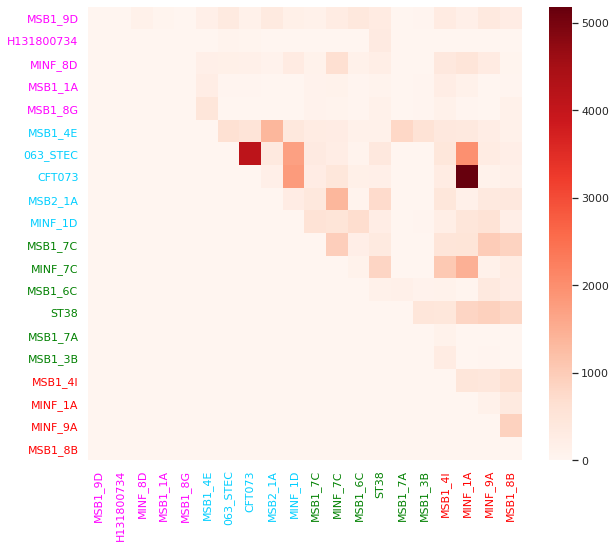

In [16]:
ax = sns.heatmap(count_matrix, xticklabels=samples, yticklabels=samples, cmap="Reds")
for tick in ax.get_xticklabels():
    tick.set_color(sample_to_colour[tick._text])
for tick in ax.get_yticklabels():
    tick.set_color(sample_to_colour[tick._text])
fig = ax.get_figure()
fig.tight_layout()
fig.set_size_inches(10, 10)
fig.savefig(snakemake.output.two_SNP_heatmap_plot, dpi=600, )

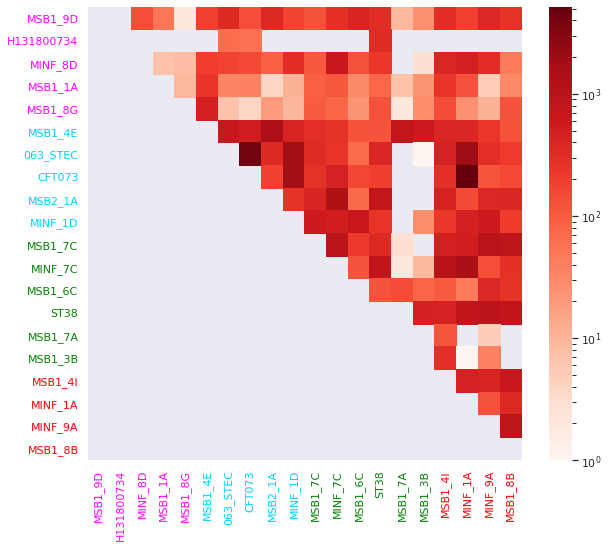

In [17]:
from matplotlib.colors import LogNorm

ax = sns.heatmap(count_matrix, xticklabels=samples, yticklabels=samples, cmap="Reds", norm=LogNorm())
for tick in ax.get_xticklabels():
    tick.set_color(sample_to_colour[tick._text])
for tick in ax.get_yticklabels():
    tick.set_color(sample_to_colour[tick._text])
fig = ax.get_figure()
fig.tight_layout()
fig.set_size_inches(10, 10)
fig.savefig(snakemake.output.two_SNP_heatmap_plot_log, dpi=600, )